# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
class EDA:
    def __init__(self, original_train_path, new_train_path):
        self.original_train_path = original_train_path
        self.new_train_path = new_train_path
        self.train_annotations = pd.read_json(original_train_path)
        self.label_data = pd.read_json(new_train_path)['label']
        self.penguin_data = self.train_annotations[self.train_annotations['category_id'] == 1]
        self.turtle_data = self.train_annotations[self.train_annotations['category_id'] == 2]
        self.penguin_area = []
        self.turtle_area = []
        self.image_path = 'new/penguin/'
        self.calculate_image_area()
    
    def calculate_image_area(self):
        self.penguin_area = self.penguin_data['area'].to_numpy() / (640 * 640)
        self.turtle_area = self.turtle_data['area'].to_numpy() / (640 * 640)

    def generate_class_graph(self):
        modified_category = self.train_annotations['category_id'].replace({1:'Penguin', 2:'Turtle'})
        ax = modified_category.value_counts().plot(kind='bar', figsize=(4, 3), rot=0, 
                                                              title='Number of original images by category')
        ax.set_xlabel('Category')
        ax.set_ylabel('Number of images')

    def generate_bbox_size_graph(self):
        fig = plt.figure(figsize=(10, 4))

        fig.add_subplot(1, 2, 1)
        penguin_width_data = []
        penguin_height_data = []
        for i in self.penguin_data['bbox'].to_numpy():
            penguin_width_data.append(i[2])
            penguin_height_data.append(i[3])
        plt.scatter(x=penguin_width_data, y=penguin_height_data).set_color('orange')
        plt.title('Bounding box width and height of penguin images', fontsize=9)
        plt.xlabel('Width of bounding box', fontsize=9)
        plt.ylabel('Height of bounding box', fontsize=9)

        fig.add_subplot(1, 2, 2)
        turtle_width_data = []
        turtle_height_data = []
        for i in self.turtle_data['bbox'].to_numpy():
            turtle_width_data.append(i[2])
            turtle_height_data.append(i[3])
        plt.scatter(x=turtle_width_data, y=turtle_height_data)
        plt.title('Bounding box width and height of turtle images', fontsize=9)
        plt.xlabel('Width of bounding box', fontsize=9)
        plt.ylabel('Height of bounding box', fontsize=9)
        return plt.show()
    
    def generate_area_ratio_graph(self):
        fig = plt.figure(figsize=(10, 4))

        fig.add_subplot(1, 2, 1)
        plt.hist(self.penguin_area, bins=50, density=True, color='orange')
        plt.title('Bounding box area ratio of penguin images', fontsize=9)
        plt.xlabel('Bounding box area ratio', fontsize=9)

        fig.add_subplot(1, 2, 2)
        plt.hist(self.turtle_area, bins=50, density=True)
        plt.title('Bounding box area ratio of turtle images', fontsize=9)
        plt.xlabel('Bounding box area ratio', fontsize=9)

        return plt.show()
    
    def calculate_area_mean_and_std(self):
        penguin_mean = np.mean(self.penguin_area)
        penguin_std = np.std(self.penguin_area)
        turtle_mean = np.mean(self.turtle_area)
        turtle_std = np.std(self.turtle_area)
        print(f'penguin area ratio mean = {penguin_mean:.3f}, standard deviation = {penguin_std:.3f}')
        print(f'turtle area ratio mean = {turtle_mean:.3f}, standard deviation = {turtle_std:.3f}')

    def generate_labels_graph(self):
        ax = self.label_data.value_counts().plot(kind='bar', figsize=(4, 3), rot=90,
                                                title='Number of augmented images by label')
        ax.set_xlabel('Labels')
        ax.set_ylabel('Number of images')

    def show_demo_augmented_images(self):
        fig = plt.figure(figsize=(14, 6))
        labels = ['Original', 'Colour Jitter', 'Coloour Invert', 'Colour Posterize', 'Rotate 90 Degree', 'Rotate 180 Degree', 
                  'Rotate 270 Degree', 'Horizontal Flip', 'Colour Jitter & Vertical Flip', 'Colour Jitter & Rotate 180 Degree']
        image_id = [0, 500, 501, 502, 503, 504, 505, 506, 507, 508]
        
        for i in range(10):
            fig.add_subplot(2, 5, i+1)
            img = Image.open(f'{self.image_path}/image_id_{image_id[i]}.jpg')
            plt.title(f'{labels[i]}', fontsize=9)
            plt.axis('off')
            plt.imshow(img)
        
        return plt.show()



In [3]:
original_train_annotation_path = 'train_annotations'
new_train_annotation_path = 'new/train_annotations'
eda = EDA(original_train_annotation_path, new_train_annotation_path)

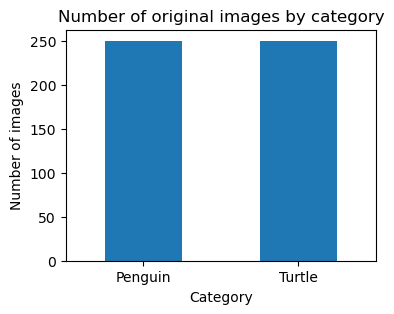

In [4]:
eda.generate_class_graph()

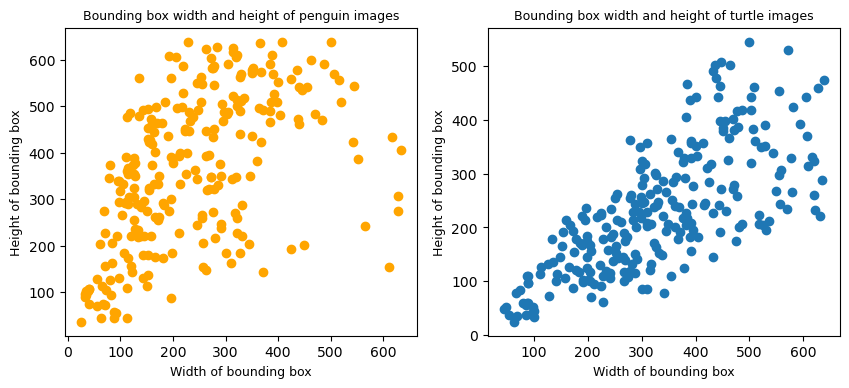

In [5]:
eda.generate_bbox_size_graph()

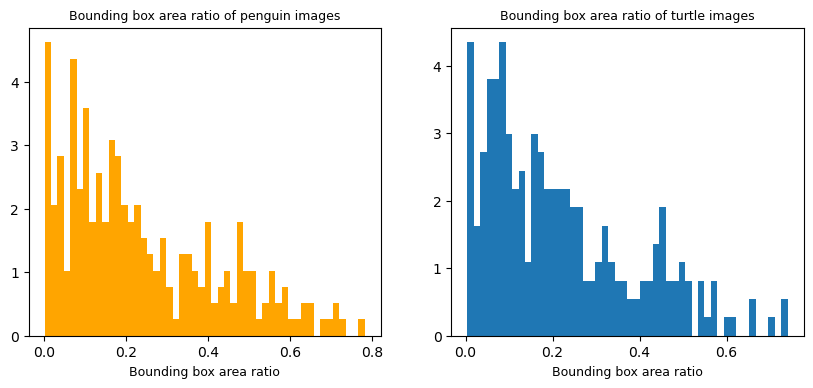

In [6]:
eda.generate_area_ratio_graph()

In [7]:
eda.calculate_area_mean_and_std()

penguin area ratio mean = 0.237, standard deviation = 0.185
turtle area ratio mean = 0.216, standard deviation = 0.169


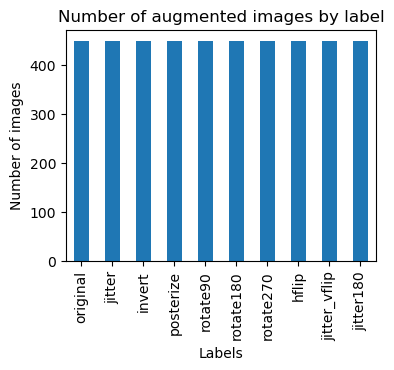

In [8]:
eda.generate_labels_graph()

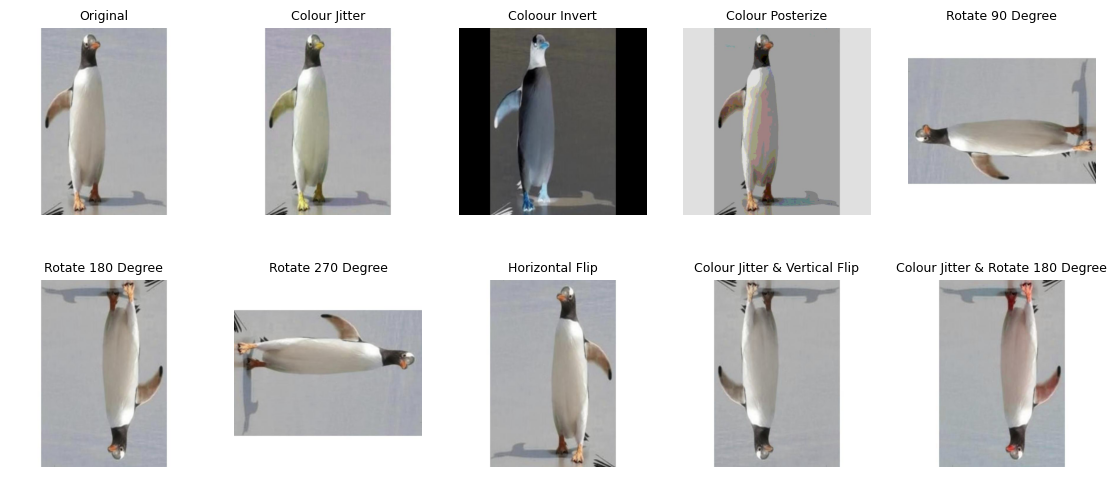

In [9]:
eda.show_demo_augmented_images()